# Goals for this Project

- [x] Import the data
- [x] Drop the Null values
- [x] Drop the index column
- [x] Check out the count and types for genres
- [x] Check out value counts per artists
- [x] Do a groupby per artist
    - [x] Figure out way to loop through songs for each artist
- [ ] Integrate fuzzywuzzy to delete duplicate songs based on song name matching of a certain percentage to avoid bias
    - [x] Write loop that enables to compare two songs and if the value is higher than a certain percentage, discard that one. If it's not, then keep it and move along.
- [ ] Run data cleaning measures, cleaning lyrics of stop words common to music (chorus, intro, outro, bridge, etc.)
- [ ] Do a train, test, split on the data for random sample and test data to work with
- [ ] Use Scikit and check out how to run SVMs on train and test data
- [ ] Check out percentages
- [ ] Tweak SVMs based on outcome?
- [ ] Report findings

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

In [2]:
#reading in the lyrics dataset
lyrics = pd.read_csv('lyrics.csv')

In [3]:
#checking out the first few lines
lyrics.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
#checking if there is anything out of the ordinary in terms of consistency
#we see that there are almost 100,000 songs that do not have lyrics, so we can get rid of those
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [5]:
#dropping any rows that have no lyrics
lyrics = lyrics.dropna()

In [6]:
#checking to make sure that all the empty rows were dropped and it looks like they were
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 6 columns):
index     266556 non-null int64
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(2), object(4)
memory usage: 14.2+ MB


In [7]:
# lyrics = lyrics.drop(columns=['index'])

In [8]:
#using to get an idea of range of years we have in this data set and it seems to be mostly from 2000's
lyrics.year.describe()

count    266556.000000
mean       2007.654909
std          10.115249
min          67.000000
25%        2006.000000
50%        2007.000000
75%        2010.000000
max        2016.000000
Name: year, dtype: float64

In [9]:
#checking all the unique genres in the dataset. It seem there are about 11 and one Not Available
genres = lyrics['genre'].unique()
print(genres)

['Pop' 'Hip-Hop' 'Not Available' 'Rock' 'Metal' 'Other' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie']


In [10]:
#checking out how many songs belong to each genre. It seems like Rock accounts for about 40% of the dataset
genres_count = lyrics.genre.value_counts()
print(genres_count)

Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: genre, dtype: int64


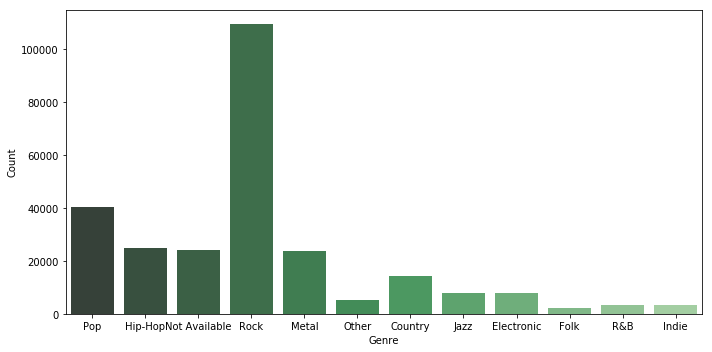

In [11]:
#putting it in a plot just to get an idea
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=lyrics, palette='Greens_d')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()

In [ ]:
#dropping rows of genres that are listed as "Not Available"
for index, row in lyrics.iterrows():
    print(index, row['genre'])
    if row['genre'] == "Not Available" or row['genre'] == "Other":
        lyrics = lyrics.drop(index, axis=0)

0 Pop
1 Pop
2 Pop
3 Pop
4 Pop
5 Pop
6 Pop
7 Pop
8 Pop
9 Pop
10 Pop
11 Pop
12 Pop
13 Pop
14 Pop
15 Pop
16 Pop
17 Pop
18 Pop
19 Pop
20 Pop
21 Pop
22 Pop
23 Pop
24 Pop
25 Pop
26 Pop
27 Pop
28 Pop
29 Pop
30 Pop
31 Pop
32 Pop
33 Pop
34 Pop
35 Pop
36 Pop
37 Pop
38 Pop
39 Pop
40 Pop
41 Pop
42 Pop
43 Pop
44 Pop
45 Pop
46 Pop
47 Pop
48 Pop
49 Pop
50 Pop
51 Pop
52 Pop
53 Pop
54 Pop
55 Pop
56 Pop
57 Pop
58 Pop
59 Pop
60 Pop
61 Pop
62 Pop
63 Pop
64 Pop
65 Pop
66 Pop
67 Pop
68 Pop
69 Pop
70 Pop
71 Pop
72 Pop
73 Pop
74 Pop
75 Pop
76 Pop
77 Pop
78 Pop
79 Pop
80 Pop
81 Pop
82 Pop
83 Pop
84 Pop
85 Pop
86 Pop
87 Pop
88 Pop
89 Pop
90 Pop
91 Pop
92 Pop
93 Pop
94 Pop
95 Pop
96 Pop
97 Pop
98 Pop
99 Pop
100 Pop
101 Pop
102 Pop
103 Pop
104 Pop
105 Pop
106 Pop
107 Pop
108 Pop
109 Pop
110 Pop
111 Pop
112 Pop
113 Pop
114 Pop
115 Pop
116 Pop
117 Pop
118 Pop
119 Pop
120 Pop
121 Pop
122 Pop
123 Pop
124 Pop
125 Pop
126 Pop
127 Pop
128 Pop
129 Pop
130 Pop
131 Pop
132 Pop
133 Pop
134 Pop
135 Pop
136 Pop
137 Pop
138 Po

1475 Not Available
1476 Not Available
1477 Not Available
1478 Not Available
1479 Not Available
1480 Not Available
1481 Not Available
1482 Not Available
1483 Not Available
1484 Not Available
1485 Not Available
1486 Not Available
1487 Not Available
1488 Not Available
1489 Not Available
1490 Not Available
1491 Not Available
1492 Not Available
1493 Not Available
1494 Pop
1495 Pop
1496 Pop
1497 Pop
1498 Pop
1499 Other
1500 Other
1501 Other
1502 Other
1503 Other
1504 Other
1505 Other
1506 Other
1507 Other
1508 Other
1509 Not Available
1510 Not Available
1511 Not Available
1512 Not Available
1513 Not Available
1514 Not Available
1515 Not Available
1516 Not Available
1517 Not Available
1518 Not Available
1519 Not Available
1520 Not Available
1521 Not Available
1522 Not Available
1523 Not Available
1524 Not Available
1525 Not Available
1526 Not Available
1527 Not Available
1528 Not Available
1529 Not Available
1530 Not Available
1531 Not Available
1532 Not Available
1533 Not Available
1534 Not 

2656 Not Available
2657 Rock
2658 Rock
2659 Rock
2660 Rock
2661 Rock
2662 Rock
2663 Rock
2664 Rock
2665 Rock
2666 Rock
2667 Rock
2685 Pop
2686 Pop
2687 Pop
2688 Pop
2689 Pop
2690 Pop
2692 Pop
2693 Pop
2694 Pop
2695 Pop
2696 Pop
2697 Rock
2698 Rock
2699 Rock
2700 Rock
2701 Rock
2702 Rock
2703 Rock
2704 Rock
2705 Rock
2706 Rock
2707 Rock
2708 Rock
2709 Rock
2710 Rock
2711 Rock
2712 Rock
2713 Rock
2714 Indie
2715 Pop
2716 Pop
2717 Rock
2718 Rock
2719 Rock
2720 Rock
2722 Rock
2724 Rock
2725 Rock
2726 Rock
2729 Rock
2730 Rock
2731 Rock
2732 Rock
2733 Rock
2735 Rock
2736 Rock
2737 Rock
2738 Rock
2739 Rock
2740 Rock
2741 Rock
2742 Rock
2743 Rock
2744 Rock
2745 Rock
2746 Rock
2747 Rock
2748 Rock
2749 Rock
2750 Rock
2751 Other
2761 Other
2763 Other
2764 Other
2765 Other
2768 Other
2776 Other
2790 Pop
2792 Pop
2793 Pop
2796 Pop
2797 Pop
2798 Pop
2799 Pop
2800 Pop
2801 Pop
2803 Pop
2804 Hip-Hop
2805 Hip-Hop
2806 Hip-Hop
2807 Hip-Hop
2808 Hip-Hop
2809 Hip-Hop
2810 Hip-Hop
2811 Hip-Hop
2812 Hip-Hop

3788 Not Available
3789 Not Available
3790 Not Available
3791 Not Available
3792 Not Available
3793 Not Available
3794 Not Available
3795 Not Available
3796 Not Available
3797 Not Available
3798 Not Available
3799 Not Available
3800 Not Available
3801 Not Available
3802 Not Available
3803 Not Available
3804 Not Available
3805 Not Available
3806 Not Available
3807 Not Available
3808 Not Available
3809 Not Available
3810 Not Available
3811 Not Available
3812 Not Available
3813 Not Available
3814 Not Available
3815 Country
3825 Country
3829 Country
3830 Country
3843 Country
3844 Country
3846 Country
3849 Country
3851 Country
3852 Country
3860 Country
3862 Country
3864 Country
3871 Country
3872 Country
3874 Country
3875 Country
3881 Country
3890 Country
3906 Country
3914 Country
3925 Country
3926 Country
3927 Country
3928 Country
3930 Country
3931 Country
3935 Country
3937 Country
3941 Country
3942 Country
3944 Country
3945 Country
3946 Country
3951 Country
3952 Rock
3953 Rock
3954 Rock
39

4978 Hip-Hop
4979 Hip-Hop
4980 Metal
4981 Metal
4982 Metal
4983 Metal
4984 Metal
4985 Metal
4986 Metal
4987 Metal
4988 Metal
4989 Metal
4990 Rock
4991 Rock
4992 Rock
4993 Rock
4994 Rock
4995 Rock
4996 Rock
4997 Rock
4998 Rock
4999 Rock
5000 Rock
5003 Country
5004 Country
5005 Country
5007 Rock
5008 Rock
5009 Rock
5010 Rock
5011 Rock
5016 Rock
5018 Rock
5019 Rock
5022 Rock
5025 Rock
5029 Rock
5030 Rock
5031 Rock
5032 Rock
5034 Rock
5035 Rock
5037 Rock
5038 Rock
5039 Rock
5040 Rock
5042 Rock
5043 Rock
5044 Rock
5045 Rock
5047 Rock
5048 Rock
5049 R&B
5050 R&B
5052 R&B
5064 Metal
5065 Metal
5066 Metal
5067 Metal
5068 Metal
5069 Metal
5070 Metal
5071 Metal
5072 Metal
5073 Metal
5074 Metal
5075 Metal
5076 Metal
5077 Metal
5078 Metal
5079 Metal
5080 Metal
5081 Metal
5082 Metal
5083 Metal
5084 Metal
5085 Metal
5086 Other
5087 Other
5088 Metal
5089 Metal
5090 Electronic
5100 Rock
5101 Rock
5102 Rock
5103 Rock
5104 Rock
5105 Rock
5106 Rock
5107 Rock
5108 Rock
5109 Rock
5110 Pop
5111 Pop
5132 Pop

6354 Other
6355 Other
6356 Other
6359 Indie
6362 Indie
6367 Indie
6370 Indie
6371 Indie
6372 Other
6373 Other
6374 Other
6375 Other
6376 Pop
6377 Pop
6378 Pop
6379 Pop
6381 Pop
6383 Pop
6384 Pop
6385 Pop
6386 Pop
6387 Pop
6388 Not Available
6389 Not Available
6390 Not Available
6391 Not Available
6392 Not Available
6393 Not Available
6398 Pop
6399 Pop
6400 Pop
6401 Pop
6402 Pop
6403 Pop
6404 Pop
6405 Pop
6406 Pop
6407 Pop
6408 Pop
6409 Pop
6410 Pop
6411 Pop
6413 Pop
6414 Pop
6415 Other
6418 Pop
6420 Pop
6423 Pop
6426 Pop
6428 Pop
6430 Pop
6432 Pop
6434 Pop
6437 Pop
6472 Pop
6479 Pop
6482 Pop
6486 Pop
6487 Pop
6489 Pop
6490 Pop
6491 Pop
6492 Rock
6493 Rock
6494 Rock
6495 Rock
6496 Rock
6498 Rock
6499 Rock
6500 Rock
6501 Rock
6502 Rock
6504 Other
6505 Other
6506 Other
6507 Other
6508 Other
6509 Other
6510 Other
6511 Other
6513 Pop
6516 Pop
6517 Pop
6518 Pop
6519 Pop
6520 Pop
6521 Pop
6523 Pop
6525 Pop
6526 Pop
6527 Pop
6528 Pop
6529 Pop
6530 Pop
6531 Pop
6568 Other
6569 Other
6570 Other


7509 Metal
7510 Metal
7511 Metal
7512 Rock
7515 Rock
7516 Rock
7517 Rock
7518 Rock
7519 Rock
7520 Rock
7521 Rock
7522 Rock
7523 Rock
7524 Rock
7525 Rock
7527 Hip-Hop
7528 Hip-Hop
7529 Metal
7530 Metal
7531 Metal
7532 Metal
7533 Metal
7534 Metal
7535 Metal
7536 Metal
7537 Metal
7538 Metal
7539 Metal
7540 Metal
7541 Metal
7542 Metal
7543 Metal
7544 Metal
7545 Metal
7546 Metal
7547 Metal
7548 Metal
7549 Metal
7550 Metal
7551 Metal
7552 Metal
7553 Metal
7554 Metal
7555 Metal
7556 Metal
7557 Metal
7558 Metal
7559 Metal
7560 Metal
7561 Metal
7562 Metal
7563 Metal
7564 Metal
7565 Metal
7566 Metal
7567 Metal
7568 Metal
7569 Metal
7570 Metal
7571 Metal
7572 Metal
7573 Metal
7574 Metal
7575 Metal
7576 Metal
7577 Metal
7578 Metal
7579 Metal
7580 Metal
7581 Metal
7582 Metal
7583 Metal
7584 Metal
7585 Metal
7588 Metal
7589 Metal
7590 Metal
7591 Metal
7592 Metal
7593 Metal
7594 Metal
7595 Metal
7596 Metal
7597 Metal
7598 Metal
7599 Metal
7600 Metal
7601 Metal
7602 Metal
7603 Metal
7604 Metal
7605 Me

8570 Not Available
8571 Not Available
8572 Not Available
8573 Not Available
8574 Not Available
8575 Not Available
8576 Not Available
8577 Not Available
8578 Not Available
8579 Not Available
8580 Not Available
8581 Not Available
8582 Rock
8583 Rock
8584 Rock
8585 Rock
8586 Rock
8587 Rock
8588 Rock
8589 Rock
8590 Rock
8591 Rock
8592 Rock
8593 Rock
8594 Rock
8595 Rock
8596 Rock
8597 Rock
8598 Rock
8599 Rock
8600 Rock
8601 Rock
8602 Rock
8603 Rock
8604 Rock
8605 Rock
8606 Rock
8607 Rock
8608 Rock
8609 Rock
8610 Rock
8611 Rock
8612 Rock
8613 Rock
8614 Rock
8615 Rock
8616 Rock
8617 Rock
8618 Rock
8619 Rock
8620 Rock
8621 Rock
8622 Rock
8623 Rock
8624 Rock
8625 Rock
8626 Rock
8627 Rock
8628 Rock
8629 Rock
8630 Rock
8631 Rock
8632 Rock
8636 Hip-Hop
8637 Hip-Hop
8638 Hip-Hop
8639 Hip-Hop
8640 Hip-Hop
8641 Hip-Hop
8642 Hip-Hop
8643 Hip-Hop
8644 Hip-Hop
8645 Hip-Hop
8646 Hip-Hop
8647 Hip-Hop
8648 Hip-Hop
8649 Hip-Hop
8650 Hip-Hop
8651 Hip-Hop
8652 Hip-Hop
8653 Hip-Hop
8654 Hip-Hop
8655 Hip-Hop
86

9403 Not Available
9405 Indie
9406 Indie
9407 Indie
9408 Indie
9409 Indie
9410 Indie
9411 Indie
9412 Indie
9413 Indie
9414 Indie
9415 Indie
9416 Indie
9417 Indie
9418 Indie
9419 Indie
9420 Indie
9421 Indie
9422 Indie
9423 Indie
9424 Indie
9425 Indie
9426 Indie
9427 Indie
9428 Indie
9429 Indie
9430 Indie
9431 Indie
9432 Indie
9433 Indie
9434 Indie
9435 Indie
9436 Indie
9437 Indie
9438 Indie
9439 Indie
9440 Indie
9441 Indie
9442 Indie
9443 Indie
9444 Indie
9445 Not Available
9454 Indie
9455 Metal
9456 Metal
9457 Metal
9458 Metal
9459 Metal
9460 Metal
9461 Metal
9462 Metal
9463 Metal
9464 Metal
9465 Metal
9466 Metal
9467 Metal
9468 Metal
9469 Metal
9470 Metal
9471 Metal
9472 Metal
9473 Metal
9474 Metal
9475 Metal
9476 Metal
9477 Metal
9478 Metal
9479 Metal
9480 Metal
9481 Metal
9482 Metal
9483 Metal
9484 Metal
9512 Hip-Hop
9531 Pop
9532 Pop
9533 Pop
9534 Pop
9535 Pop
9536 Rock
9537 Rock
9538 Rock
9539 Rock
9541 Rock
9542 Rock
9543 Rock
9544 Rock
9545 Rock
9546 Rock
9547 Rock
9548 Rock
955

10613 Other
10614 Other
10615 Other
10616 Other
10617 Other
10618 Other
10619 Other
10620 Other
10621 Metal
10622 Metal
10623 Metal
10624 Metal
10625 Metal
10626 Metal
10627 Metal
10628 Metal
10629 Metal
10630 Metal
10631 Metal
10632 Metal
10633 Metal
10634 Metal
10635 Metal
10636 Metal
10637 Metal
10638 Metal
10639 Metal
10640 Metal
10641 Metal
10642 Metal
10643 Metal
10644 Metal
10645 Metal
10646 Metal
10647 Metal
10648 Metal
10649 Metal
10650 Metal
10651 Metal
10652 Metal
10653 Metal
10654 Metal
10655 Metal
10656 Metal
10657 Metal
10658 Metal
10659 Metal
10660 Metal
10661 Metal
10662 Metal
10663 Metal
10664 Metal
10665 Metal
10666 Metal
10667 Metal
10668 Metal
10669 Metal
10670 Metal
10671 Metal
10672 Metal
10673 Metal
10674 Metal
10675 Metal
10676 Metal
10677 Metal
10678 Metal
10679 Metal
10680 Metal
10681 Metal
10682 Metal
10683 Metal
10684 Metal
10685 Metal
10686 Metal
10687 Metal
10688 Metal
10689 Metal
10690 Metal
10691 Metal
10692 Metal
10693 Metal
10694 Metal
10695 Metal
1069

11903 Rock
11904 Rock
11919 Other
11950 Other
11951 Other
11952 Rock
11953 Rock
11954 Rock
11955 Rock
11956 Rock
11957 Rock
11958 Not Available
11977 Electronic
11978 Electronic
11979 Electronic
11980 Electronic
11981 Electronic
11982 Electronic
11983 Electronic
11984 Electronic
11985 Electronic
11986 Electronic
11987 Electronic
11988 Electronic
11989 Not Available
11990 Rock
11991 Rock
11992 Not Available
11993 Pop
11994 Not Available
11995 Not Available
11996 Not Available
11997 Not Available
11998 Rock
11999 Other
12013 Hip-Hop
12026 Pop
12027 Pop
12028 Pop
12030 Pop
12031 Pop
12032 Pop
12033 Pop
12034 Pop
12035 Pop
12037 Not Available
12038 Not Available
12039 Rock
12040 Rock
12041 Rock
12042 Rock
12043 Rock
12044 Rock
12045 Rock
12046 Rock
12047 Rock
12048 Rock
12049 Rock
12050 Rock
12051 Rock
12052 Rock
12053 Rock
12054 Rock
12055 Rock
12056 Rock
12057 Rock
12058 Rock
12059 Rock
12060 Rock
12061 Rock
12062 Rock
12063 Rock
12064 Rock
12065 Rock
12066 Rock
12067 Rock
12068 Rock
120

12804 Electronic
12805 Electronic
12806 Electronic
12807 Electronic
12808 Electronic
12812 Other
12813 Other
12814 Other
12817 Other
12841 Rock
12847 Electronic
12849 Jazz
12850 Jazz
12851 Jazz
12852 Jazz
12853 Jazz
12854 Jazz
12855 Jazz
12868 Pop
12869 Pop
12870 Pop
12871 Pop
12872 Pop
12873 Pop
12874 Pop
12875 Pop
12876 Pop
12877 Pop
12878 Pop
12879 Pop
12880 Pop
12881 Pop
12882 Pop
12883 Pop
12884 Pop
12885 Pop
12886 Pop
12887 Pop
12888 Pop
12889 Pop
12890 Pop
12891 Pop
12892 Pop
12893 Pop
12894 Pop
12895 Pop
12896 Pop
12897 Pop
12898 Pop
12899 Pop
12900 Pop
12901 Pop
12902 Pop
12903 Pop
12904 Pop
12905 Pop
12906 Pop
12908 Pop
12910 Pop
12911 Pop
12912 Pop
12913 Pop
12914 Pop
12915 Pop
12916 Pop
12917 Pop
12918 Pop
12919 Pop
12920 Pop
12921 Pop
12922 Pop
12923 Pop
12924 Pop
12925 Rock
12926 Rock
12927 Rock
12928 Rock
12929 Rock
12930 Rock
12931 Hip-Hop
12932 Hip-Hop
12933 Hip-Hop
12934 Rock
12935 Rock
12936 Rock
12937 Rock
12938 Rock
12939 Rock
12940 Rock
12941 Rock
12942 Rock
12943

13820 Not Available
13821 Not Available
13822 Not Available
13823 Not Available
13824 Not Available
13826 Hip-Hop
13828 Metal
13829 Metal
13830 Metal
13831 Metal
13832 Metal
13833 Metal
13834 Metal
13835 Metal
13836 Metal
13837 Metal
13839 Not Available
13840 Not Available
13841 Not Available
13842 Not Available
13843 Metal
13844 Metal
13845 Metal
13846 Metal
13847 Metal
13848 Metal
13849 Metal
13850 Metal
13851 Metal
13852 Metal
13853 Metal
13854 Metal
13855 Metal
13856 Metal
13857 Metal
13858 Metal
13859 Metal
13860 Metal
13861 Metal
13862 Metal
13863 Metal
13864 Metal
13865 Metal
13866 Metal
13867 Metal
13868 Metal
13869 Metal
13870 Metal
13871 Metal
13872 Metal
13873 Metal
13874 Metal
13875 Metal
13876 Metal
13877 Metal
13878 Metal
13879 Metal
13880 Metal
13881 Metal
13882 Metal
13883 Metal
13884 Metal
13885 Metal
13886 Metal
13887 Metal
13888 Metal
13889 Metal
13890 Metal
13891 Metal
13892 Metal
13893 Metal
13894 Metal
13895 Rock
13896 Rock
13897 Rock
13898 Rock
13899 Rock
13900 R

14740 Not Available
14742 Not Available
14743 Not Available
14744 Not Available
14745 Not Available
14746 Not Available
14747 Not Available
14748 Not Available
14749 Not Available
14750 Not Available
14751 Not Available
14752 Not Available
14753 Not Available
14754 Not Available
14755 Not Available
14756 Not Available
14757 Not Available
14758 Not Available
14759 Not Available
14760 Not Available
14761 Not Available
14762 Not Available
14763 Not Available
14765 Not Available
14767 Not Available
14769 Metal
14770 Metal
14771 Metal
14772 Metal
14773 Metal
14774 Metal
14775 Metal
14776 Metal
14777 Metal
14778 Metal
14779 Metal
14780 Metal
14781 Metal
14782 Metal
14783 Rock
14784 Rock
14785 Rock
14786 Rock
14787 Rock
14788 Rock
14789 Rock
14790 Rock
14791 Rock
14792 Rock
14793 Rock
14794 Rock
14795 Rock
14796 Not Available
14810 Rock
14811 Rock
14812 Rock
14813 Hip-Hop
14814 Rock
14815 Rock
14816 Rock
14817 Rock
14818 Rock
14819 Rock
14820 Rock
14821 Rock
14822 Rock
14823 Rock
14824 Rock
1

16475 Hip-Hop
16476 Hip-Hop
16477 Hip-Hop
16478 Hip-Hop
16480 Hip-Hop
16481 Hip-Hop
16482 Hip-Hop
16484 Hip-Hop
16486 Rock
16487 Rock
16488 Rock
16489 Rock
16490 Rock
16491 Rock
16492 Rock
16493 Rock
16494 Rock
16495 Rock
16496 Rock
16497 Rock
16498 Rock
16499 Rock
16500 Rock
16501 Rock
16502 Rock
16503 Rock
16504 Rock
16505 Rock
16506 Rock
16507 Rock
16508 Rock
16509 Rock
16510 Rock
16511 Rock
16512 Rock
16513 Rock
16514 Rock
16515 Rock
16516 Rock
16517 Rock
16518 Rock
16519 Rock
16520 Rock
16521 Rock
16522 Rock
16523 Rock
16524 Rock
16525 Rock
16526 Rock
16527 Rock
16528 Rock
16529 Rock
16530 Rock
16531 Rock
16532 Rock
16533 Rock
16534 Rock
16535 Rock
16536 Rock
16537 Rock
16538 Rock
16539 Rock
16540 Rock
16541 Rock
16542 Rock
16543 Rock
16544 Rock
16545 Rock
16546 Rock
16547 Rock
16548 Rock
16549 Rock
16550 Rock
16551 Rock
16552 Rock
16553 Rock
16554 Rock
16562 Metal
16563 Metal
16564 Metal
16565 Metal
16566 Metal
16567 Metal
16568 Metal
16569 Metal
16570 Metal
16571 Metal
16572 Met

17535 Other
17536 Rock
17537 Rock
17538 Rock
17539 Rock
17540 Rock
17541 Rock
17542 Rock
17543 Rock
17544 Rock
17545 Rock
17549 Hip-Hop
17550 Hip-Hop
17551 Hip-Hop
17556 R&B
17557 R&B
17558 R&B
17559 R&B
17560 R&B
17561 R&B
17562 R&B
17563 R&B
17564 R&B
17565 R&B
17566 R&B
17567 R&B
17568 R&B
17569 R&B
17570 R&B
17571 R&B
17572 R&B
17573 R&B
17574 R&B
17575 R&B
17576 R&B
17577 R&B
17578 R&B
17579 R&B
17580 R&B
17581 R&B
17583 Other
17584 Hip-Hop
17585 Rock
17586 Rock
17587 Metal
17588 Metal
17589 Metal
17590 Metal
17591 Metal
17592 Metal
17593 Metal
17594 Metal
17595 Metal
17596 Metal
17597 Metal
17598 Metal
17599 Metal
17600 Metal
17601 Metal
17602 Metal
17603 Metal
17604 Metal
17605 Metal
17606 Metal
17607 Metal
17608 Metal
17609 Metal
17610 Metal
17611 Metal
17612 Metal
17613 Metal
17614 Metal
17615 Metal
17616 Metal
17617 Metal
17618 Electronic
17619 Electronic
17620 Electronic
17621 Electronic
17622 Electronic
17623 Electronic
17624 Electronic
17625 Electronic
17626 Electronic
176

18309 Other
18310 Other
18311 Other
18323 Not Available
18324 Pop
18325 Pop
18326 Pop
18327 Pop
18328 Pop
18329 Pop
18330 Pop
18331 Pop
18332 Pop
18333 Pop
18334 Pop
18335 Pop
18336 Pop
18337 Pop
18338 Pop
18339 Pop
18340 Pop
18341 Pop
18342 Pop
18343 Pop
18344 Pop
18351 Not Available
18352 Not Available
18353 Not Available
18354 Not Available
18355 Not Available
18356 Not Available
18357 Not Available
18358 Not Available
18359 Metal
18360 Not Available
18361 Pop
18362 Pop
18363 Pop
18364 Pop
18365 Pop
18366 Pop
18367 Pop
18368 Pop
18369 Pop
18370 Pop
18371 Pop
18372 Pop
18373 Pop
18374 Pop
18375 Pop
18376 Pop
18377 Pop
18378 Pop
18379 Pop
18380 Pop
18381 Pop
18382 Pop
18383 Pop
18384 Pop
18385 Pop
18386 Pop
18387 Pop
18388 Pop
18389 Pop
18390 Pop
18391 Pop
18392 Pop
18393 Pop
18394 Pop
18395 Pop
18396 Pop
18397 Pop
18398 Pop
18399 Pop
18400 Pop
18401 Pop
18402 Pop
18403 Pop
18404 Pop
18405 Pop
18406 Pop
18407 Pop
18424 Hip-Hop
18438 Pop
18439 Pop
18440 Pop
18441 Folk
18442 Folk
18443 

19263 Rock
19272 Electronic
19273 Electronic
19274 Electronic
19275 Electronic
19276 Electronic
19277 Electronic
19278 Electronic
19279 Electronic
19280 Electronic
19281 Electronic
19282 Electronic
19283 Electronic
19284 Electronic
19285 Electronic
19286 Electronic
19287 Electronic
19288 Electronic
19289 Electronic
19290 Electronic
19291 Electronic
19292 Electronic
19293 Electronic
19294 Electronic
19295 Electronic
19297 Electronic
19298 Electronic
19299 Electronic
19300 Electronic
19301 Electronic
19302 Electronic
19303 Electronic
19304 Electronic
19306 Electronic
19307 Electronic
19308 Electronic
19310 Electronic
19311 Electronic
19312 Electronic
19313 Electronic
19314 Electronic
19315 Electronic
19316 Electronic
19317 Electronic
19318 Electronic
19319 Electronic
19320 Electronic
19321 Electronic
19322 Electronic
19323 Electronic
19324 Electronic
19325 Electronic
19326 Electronic
19327 Electronic
19328 Electronic
19329 Electronic
19330 Electronic
19331 Electronic
19332 Electronic
193

20208 Rock
20209 Rock
20210 Rock
20211 Rock
20212 Rock
20213 Rock
20214 Rock
20215 Rock
20216 Rock
20217 Rock
20218 Rock
20219 Rock
20220 Rock
20221 Rock
20222 Rock
20223 Rock
20224 Rock
20225 Rock
20226 Rock
20227 Rock
20228 Rock
20229 Not Available
20230 Not Available
20231 Not Available
20232 Not Available
20233 Not Available
20234 Not Available
20235 Not Available
20236 Not Available
20237 Not Available
20238 Not Available
20239 Not Available
20240 Not Available
20241 Not Available
20242 Not Available
20243 Not Available
20244 Not Available
20245 Not Available
20246 Not Available
20247 Not Available
20248 Not Available
20249 Not Available
20250 Not Available
20251 Not Available
20252 Not Available
20253 Not Available
20254 Not Available
20255 Not Available
20256 Not Available
20257 Not Available
20258 Not Available
20259 Not Available
20260 Not Available
20261 Not Available
20262 Not Available
20263 Not Available
20264 Not Available
20265 Not Available
20266 Not Available
20267 Not

21089 Pop
21090 Pop
21091 Pop
21092 Pop
21093 Pop
21094 Pop
21095 Hip-Hop
21096 Hip-Hop
21097 Hip-Hop
21098 Hip-Hop
21099 Metal
21100 Metal
21101 Metal
21102 Metal
21103 Metal
21105 Pop
21106 Pop
21107 Pop
21108 Pop
21116 Pop
21119 Pop
21121 Pop
21122 Pop
21123 Pop
21128 Pop
21129 Pop
21130 Pop
21131 Pop
21132 Pop
21133 Pop
21136 Pop
21137 Pop
21138 Pop
21139 Pop
21140 Pop
21142 Pop
21143 Pop
21144 Pop
21145 Pop
21146 Pop
21147 Pop
21158 Not Available
21159 Not Available
21160 Not Available
21161 Not Available
21162 Not Available
21163 Other
21164 Hip-Hop
21165 Rock
21166 Hip-Hop
21167 Rock
21168 Rock
21169 Rock
21170 Rock
21171 Rock
21172 Rock
21173 Rock
21174 Rock
21175 Rock
21176 Rock
21177 Rock
21178 Rock
21181 Rock
21183 Rock
21184 Rock
21185 Rock
21186 Rock
21187 Rock
21188 Rock
21189 Metal
21190 Metal
21191 Metal
21192 Metal
21193 Metal
21194 Metal
21195 Metal
21196 Metal
21197 Metal
21198 Metal
21199 Metal
21200 Metal
21201 Metal
21202 Metal
21204 Metal
21205 Metal
21206 Metal


22016 Other
22017 Metal
22018 Metal
22019 Metal
22020 Metal
22021 Metal
22022 Metal
22023 Metal
22024 Metal
22025 Metal
22026 Metal
22027 Metal
22028 Metal
22029 Pop
22030 Pop
22031 Pop
22032 Pop
22033 Pop
22034 Pop
22035 Pop
22036 Pop
22037 Pop
22038 Pop
22039 Pop
22040 Pop
22041 Pop
22042 Pop
22043 Pop
22044 Pop
22045 Pop
22046 Pop
22047 Pop
22048 Pop
22049 Pop
22050 Pop
22051 Pop
22052 Pop
22053 Pop
22054 Pop
22055 Pop
22056 Pop
22057 Pop
22058 Pop
22059 Pop
22060 Pop
22061 Pop
22065 Electronic
22066 Electronic
22067 Indie
22068 Rock
22069 Rock
22070 Rock
22071 Rock
22072 Rock
22073 Rock
22074 Rock
22075 Rock
22076 Rock
22077 Rock
22078 Rock
22079 Rock
22080 Rock
22081 Rock
22082 Rock
22083 Rock
22084 Rock
22085 Rock
22086 Rock
22087 Rock
22088 Rock
22089 Rock
22090 Rock
22091 Rock
22092 Rock
22093 Rock
22094 Rock
22095 Rock
22096 Rock
22107 R&B
22112 R&B
22115 R&B
22122 R&B
22123 R&B
22125 R&B
22128 R&B
22129 R&B
22132 R&B
22133 R&B
22134 R&B
22135 R&B
22136 R&B
22137 R&B
22138 R&B

23110 Hip-Hop
23111 Hip-Hop
23112 Hip-Hop
23113 Hip-Hop
23114 Hip-Hop
23115 Hip-Hop
23116 Hip-Hop
23117 Hip-Hop
23118 Hip-Hop
23119 Hip-Hop
23120 Hip-Hop
23121 Hip-Hop
23122 Hip-Hop
23123 Hip-Hop
23124 Hip-Hop
23125 Hip-Hop
23126 Hip-Hop
23127 Hip-Hop
23128 Hip-Hop
23129 Hip-Hop
23132 Hip-Hop
23133 Hip-Hop
23134 Hip-Hop
23136 Hip-Hop
23138 Pop
23139 Pop
23140 Pop
23141 Pop
23142 Pop
23143 Pop
23144 Pop
23145 Pop
23146 Pop
23147 Pop
23148 Pop
23149 Pop
23150 Pop
23151 Pop
23152 Pop
23153 Pop
23154 Pop
23155 Pop
23156 Pop
23157 Pop
23158 Pop
23159 Pop
23160 Pop
23161 Pop
23162 Pop
23163 Pop
23164 Pop
23165 Pop
23166 Pop
23167 Pop
23168 Pop
23169 Pop
23170 Pop
23171 Pop
23172 Pop
23173 Pop
23174 Pop
23175 Pop
23176 Pop
23177 Pop
23178 Pop
23179 Pop
23180 Pop
23181 Pop
23182 Pop
23183 Pop
23184 Pop
23185 Pop
23186 Pop
23187 Pop
23188 Pop
23189 Pop
23190 Pop
23191 Pop
23192 Pop
23193 Pop
23194 Pop
23195 Pop
23196 Pop
23197 Pop
23198 Pop
23199 Pop
23200 Pop
23201 Pop
23202 Pop
23203 Pop
2320

24445 Electronic
24446 Electronic
24447 Electronic
24448 Electronic
24449 Electronic
24450 Electronic
24451 Electronic
24462 Rock
24463 Rock
24464 Rock
24465 Rock
24466 Rock
24467 Rock
24468 Rock
24469 Rock
24470 Rock
24471 Rock
24472 Rock
24473 Rock
24474 Rock
24475 Rock
24476 Rock
24477 Rock
24478 Rock
24479 Rock
24480 Rock
24481 Rock
24482 Rock
24487 Rock
24488 Rock
24494 Rock
24495 Rock
24496 Rock
24497 Rock
24498 Rock
24499 Rock
24500 Rock
24502 Rock
24503 Rock
24504 Rock
24505 Rock
24506 Rock
24507 Rock
24508 Rock
24509 Rock
24510 Rock
24511 Rock
24512 Rock
24513 Rock
24514 Rock
24515 Rock
24516 Rock
24517 Rock
24518 Rock
24519 Rock
24520 Rock
24521 Rock
24522 Rock
24523 Rock
24524 Rock
24525 Rock
24526 Rock
24527 Rock
24528 Rock
24529 Rock
24530 Rock
24531 Rock
24532 Rock
24533 Rock
24534 Rock
24535 Rock
24536 Rock
24537 Rock
24538 Rock
24539 Rock
24540 Rock
24541 Rock
24542 Rock
24543 Rock
24544 Rock
24545 Rock
24546 Rock
24547 Rock
24548 Rock
24549 Rock
24550 Rock
24551 Rock
2

25461 Not Available
25464 Not Available
25466 Not Available
25469 Not Available
25472 Not Available
25473 Not Available
25474 Not Available
25475 Not Available
25476 Not Available
25477 Not Available
25478 Not Available
25479 Not Available
25480 Not Available
25481 Not Available
25482 Not Available
25483 Not Available
25484 Not Available
25485 Rock
25486 Rock
25487 Rock
25488 Rock
25489 Rock
25490 Rock
25491 Rock
25492 Rock
25493 Rock
25494 Rock
25495 Rock
25496 Rock
25497 Rock
25498 Rock
25499 Rock
25500 Rock
25504 Rock
25505 Rock
25506 Rock
25507 Rock
25510 Rock
25511 Rock
25512 Rock
25513 Rock
25514 Rock
25515 Rock
25516 Rock
25517 Rock
25518 Rock
25519 Rock
25520 Rock
25521 Folk
25522 Folk
25523 Folk
25524 Folk
25525 Folk
25526 Folk
25527 Folk
25528 Folk
25529 Folk
25530 Folk
25531 Folk
25532 Folk
25533 Folk
25534 Folk
25535 Folk
25536 Folk
25537 Folk
25538 Folk
25539 Folk
25540 Folk
25541 Folk
25542 Folk
25543 Folk
25544 Folk
25545 Folk
25546 Folk
25553 Not Available
25554 R&B
255

26600 Not Available
26601 Not Available
26602 Not Available
26603 Not Available
26604 Not Available
26605 Not Available
26606 Not Available
26607 Not Available
26608 Not Available
26609 Not Available
26610 Not Available
26622 Other
26623 Other
26624 Other
26625 Other
26626 Other
26627 Metal
26628 Metal
26629 Metal
26630 Metal
26631 Metal
26632 Metal
26633 Metal
26634 Metal
26635 Metal
26636 Metal
26637 Not Available
26638 Not Available
26639 Not Available
26640 Not Available
26641 Metal
26642 Metal
26643 Metal
26644 Metal
26645 Metal
26646 Metal
26647 Metal
26648 Metal
26649 Metal
26650 Metal
26651 Metal
26652 Metal
26653 Metal
26654 Metal
26655 Metal
26656 Metal
26657 Metal
26658 Metal
26659 Metal
26660 Metal
26661 Metal
26662 Metal
26663 Metal
26664 Metal
26665 Metal
26666 Metal
26667 Metal
26668 Metal
26669 Metal
26670 Metal
26671 Metal
26672 Metal
26673 Metal
26674 Metal
26675 Metal
26676 Metal
26677 Metal
26678 Metal
26679 Metal
26680 Metal
26681 Metal
26701 Not Available
26702 Ro

27463 Not Available
27467 Other
27471 Other
27472 Other
27474 Other
27475 Not Available
27476 Not Available
27478 Pop
27479 Pop
27480 Pop
27481 Metal
27482 Metal
27483 Metal
27484 Metal
27485 Metal
27486 Metal
27487 Metal
27488 Metal
27489 Metal
27490 Metal
27491 Metal
27492 Metal
27493 Metal
27494 Metal
27496 Rock
27499 Rock
27508 Rock
27509 Rock
27510 Rock
27529 Pop
27530 Pop
27531 Pop
27532 Pop
27533 Pop
27534 Pop
27535 Pop
27536 Pop
27537 Pop
27538 Pop
27539 Pop
27540 Pop
27546 Not Available
27547 Not Available
27557 Rock
27559 Other
27560 Rock
27561 Rock
27562 Rock
27563 Rock
27564 Rock
27565 Rock
27566 Rock
27567 Rock
27568 Rock
27569 Rock
27570 Rock
27571 Rock
27572 Rock
27573 Rock
27574 Rock
27575 Rock
27576 Rock
27577 Rock
27578 Rock
27579 Rock
27580 Rock
27581 Rock
27582 Rock
27583 Rock
27584 Rock
27585 Rock
27586 Rock
27587 Rock
27588 Rock
27589 Rock
27590 Rock
27591 Rock
27592 Rock
27593 Rock
27594 Rock
27595 Rock
27596 Rock
27597 Rock
27598 Rock
27599 Rock
27600 Rock
27601

28369 Rock
28370 Rock
28372 Rock
28373 Rock
28376 Rock
28377 Rock
28379 Rock
28381 Rock
28383 Rock
28384 Rock
28386 Rock
28387 Rock
28388 Rock
28389 Rock
28390 Rock
28391 Rock
28392 Rock
28393 Rock
28394 Rock
28395 Rock
28396 Rock
28397 Rock
28398 Rock
28399 Rock
28400 Rock
28401 Rock
28402 Rock
28403 Rock
28404 Rock
28405 Rock
28406 Rock
28407 Rock
28408 Rock
28409 Rock
28410 Rock
28411 Rock
28412 Rock
28413 Rock
28414 Rock
28415 Rock
28416 Rock
28417 Rock
28418 Rock
28419 Rock
28420 Rock
28421 Rock
28423 Rock
28424 Rock
28425 Rock
28426 Rock
28427 Rock
28428 Rock
28429 Rock
28430 Rock
28431 Rock
28432 Rock
28433 R&B
28435 R&B
28436 R&B
28437 R&B
28438 R&B
28439 R&B
28442 R&B
28443 R&B
28444 R&B
28445 R&B
28448 R&B
28449 R&B
28450 R&B
28451 R&B
28452 R&B
28453 R&B
28454 R&B
28455 R&B
28457 R&B
28458 R&B
28459 R&B
28460 R&B
28461 R&B
28462 R&B
28463 R&B
28465 Rock
28466 Rock
28467 Rock
28468 Rock
28469 Rock
28470 Rock
28471 Rock
28472 Rock
28473 Rock
28474 Rock
28475 Rock
28476 Rock
28

29245 Other
29246 Other
29247 Other
29248 Other
29249 Other
29250 Other
29251 Other
29252 Other
29253 Other
29254 Other
29255 Electronic
29256 Rock
29258 Rock
29259 Rock
29260 Rock
29261 Rock
29262 Rock
29263 Rock
29266 Jazz
29269 Jazz
29280 Other
29281 Indie
29282 Not Available
29283 Not Available
29284 Not Available
29285 Not Available
29286 Not Available
29287 Not Available
29288 Not Available
29289 Not Available
29290 Not Available
29291 Not Available
29292 Not Available
29293 Not Available
29294 Not Available
29295 Rock
29296 Rock
29297 Rock
29298 Rock
29299 Rock
29300 Rock
29301 Rock
29302 Rock
29303 Rock
29304 Rock
29305 Rock
29306 Rock
29307 Rock
29308 Rock
29309 Rock
29310 Rock
29311 Rock
29312 Rock
29313 Rock
29314 Rock
29315 Rock
29316 Rock
29317 Rock
29318 Rock
29319 Rock
29320 Rock
29321 Rock
29322 Rock
29323 Rock
29324 Rock
29325 Rock
29326 Rock
29327 Rock
29328 Rock
29329 Rock
29330 Rock
29331 Rock
29332 Rock
29333 Rock
29334 Rock
29335 Rock
29336 Pop
29337 Pop
29338 Pop

30027 Not Available
30029 Not Available
30030 Not Available
30031 Not Available
30032 Not Available
30033 Not Available
30034 Not Available
30035 Not Available
30036 Not Available
30037 Not Available
30038 Not Available
30039 Not Available
30040 Not Available
30041 Not Available
30042 Not Available
30043 Not Available
30044 Not Available
30045 Not Available
30046 Not Available
30047 Not Available
30048 Not Available
30049 Not Available
30050 Not Available
30053 Pop
30054 Pop
30055 Pop
30056 Not Available
30057 Not Available
30058 Not Available
30059 Rock
30060 Rock
30061 Rock
30062 Rock
30063 Rock
30064 Rock
30065 Rock
30066 Rock
30067 Rock
30068 Rock
30069 Rock
30070 Rock
30071 Rock
30072 Rock
30074 Hip-Hop
30075 Hip-Hop
30076 Hip-Hop
30077 Hip-Hop
30078 Hip-Hop
30079 Hip-Hop
30080 Hip-Hop
30081 Hip-Hop
30082 Hip-Hop
30083 Hip-Hop
30084 Hip-Hop
30085 Hip-Hop
30086 Hip-Hop
30087 Hip-Hop
30088 Hip-Hop
30089 Hip-Hop
30090 Hip-Hop
30091 Hip-Hop
30092 Hip-Hop
30093 Hip-Hop
30094 Hip-Hop
30

31055 Not Available
31056 Not Available
31057 Other
31058 Not Available
31071 Rock
31072 Rock
31073 Rock
31074 Rock
31075 Rock
31076 Rock
31077 Rock
31078 Rock
31079 Rock
31080 Rock
31081 Rock
31082 Rock
31083 Rock
31084 Rock
31085 Rock
31086 Rock
31087 Rock
31088 Rock
31089 Rock
31090 Rock
31091 Rock
31092 Rock
31093 Rock
31094 Rock
31096 Rock
31097 Rock
31098 Rock
31099 Rock
31100 Rock
31101 Rock
31102 Rock
31103 Rock
31104 Rock
31105 Rock
31106 Rock
31107 Rock
31108 Rock
31109 Rock
31110 Rock
31111 Rock
31112 Rock
31113 Rock
31114 Rock
31115 Rock
31116 Rock
31117 Rock
31118 Rock
31119 Rock
31120 Rock
31121 Rock
31122 Rock
31123 Rock
31124 Rock
31125 Rock
31126 Rock
31127 Rock
31128 Rock
31129 Rock
31130 Rock
31131 Rock
31132 Rock
31133 Rock
31134 Rock
31135 Rock
31136 Rock
31137 Rock
31138 Rock
31139 Rock
31140 Rock
31141 Rock
31142 Rock
31143 Hip-Hop
31144 Not Available
31145 Not Available
31146 Not Available
31147 Not Available
31148 Not Available
31149 Not Available
31150 Country

32334 Rock
32335 Rock
32336 Rock
32337 Rock
32338 Rock
32339 Rock
32340 Rock
32341 Rock
32342 Rock
32343 Rock
32344 Rock
32345 Rock
32346 Rock
32347 Rock
32348 Rock
32349 Rock
32350 Rock
32351 Rock
32352 Rock
32353 Rock
32354 Rock
32355 Rock
32356 Rock
32357 Rock
32358 Rock
32359 Not Available
32360 Not Available
32362 Not Available
32364 Not Available
32365 Not Available
32371 Not Available
32372 Not Available
32373 Not Available
32374 Not Available
32376 Not Available
32377 Not Available
32378 Rock
32379 Rock
32380 Rock
32381 Rock
32382 Rock
32383 Rock
32384 Rock
32385 Rock
32386 Rock
32387 Rock
32388 Rock
32389 Rock
32390 Rock
32391 Rock
32392 Rock
32393 Rock
32394 Rock
32395 Rock
32396 Rock
32397 Rock
32398 Rock
32399 Rock
32409 Other
32413 Other
32420 Pop
32422 Pop
32423 Not Available
32425 Pop
32427 Pop
32428 Pop
32429 Rock
32430 Rock
32431 Rock
32432 Rock
32433 Rock
32434 Rock
32435 Rock
32436 Rock
32437 Rock
32438 Rock
32439 Rock
32440 Rock
32441 Rock
32442 Rock
32443 Rock
3244

In [ ]:
print(len(lyrics))
lyrics.genre.value_counts()

In [ ]:
#checking how many artists songs are in the dataset. It seems like there may be a lot of duplicates
#I don't think there could be as many as 450 to 700 songs from each of these artists

artists_group = lyrics.groupby("artist")
print(len(artists_group.artist.count()))
# artists_group.count().sort_values(by='song', ascending=False).head(50)

In [ ]:
#checking to see if there are duplicate songs in the dataset
dolly = lyrics[lyrics['artist'] == 'dolly-parton']
# dolly.sort_values(by = 'song').head(50)

In [ ]:
#checking output for the groups. Looks to output the indexes for the songs. Will use this for iterating through
#the song names and removing duplicates
artists = artists_group.apply(lambda x: x.sort_values("song"))
# artists

In [ ]:
#Checking output sample
artists.loc['childish-gambino'].lyrics

In [ ]:
#test case for iterating through artists songs
# lastsong = ""
# for index,row in artists.loc['dolly-parton'].iterrows():
#     currentsong = row.song
#     print(currentsong)
#     print(lastsong)
#     if fuzz.ratio(currentsong, lastsong) >= 85:
#         lastsong = row.song
#         lyrics = lyrics.drop(index[1], axis=0)
#     print(fuzz.partial_ratio(currentsong, lastsong))
    
#     print(lastsong)


In [ ]:
# for name, group in artists_group:
#     if len(group) > 1:
#         for row in group:
#             print(row)
# #             song1 = lyrics
# #             song2 = row.song
# #             if fuzz.ratio(song1, song2) > 80:
# #                 lyrics = lyrics.drop(lyrics.lyrics.iloc[index])
#     print(group)
    
lastsong = ""
for index,row in artists.iterrows():
    currentsong = row.song
#     print(index[1], currentsong)
#     print(lastsong)
    if fuzz.ratio(currentsong, lastsong) >= 85:
#         lastsong = row.song
        lyrics = lyrics.drop(index[1], axis=0)
#     print(fuzz.partial_ratio(currentsong, lastsong))
    lastsong = row.song
#     print(lastsong)
# len(artists['dolly-parton'])

In [ ]:
len(lyrics)

In [ ]:
#This is to add genres to their own data slices
#could be used later for wordcloud perhaps

#not_available = lyrics[lyrics['genre'] == 'Not Available']
#print(not_available.head(20))

In [ ]:
#print(not_available.sort_values(by='artist').head(20))

In [ ]:
lyricsep = lyrics['lyrics']
lyricsep2 = lyrics['lyrics']

In [ ]:
type(lyricsep)

In [ ]:
#lyricsep=pd.DataFrame(lyricsep)

In [ ]:
print(len(lyricsep))
lyricsep[346759]

In [ ]:
#lyricsep[425]

In [ ]:
replace = ["r/'\p{P}/'","r/'VERSE/'", "r/'Verse'","r/'CHORUS/'", "r/'Chorus'","r/'INSTRUMENTAL/'", "r/'Instrumental'","r/'x\d/'","r/'\dx/'","r/'X\d/'","r/'\d]/'","r/'BRIDGE/'", "r/'Bridge'","r/'HOOK'", "r/'Hook'","r/'Pre/'","r/'INTRO/'", "r/'Intro'","r/'OUTRO/'", "r/'Outro'","r/'\d/'","r/'^\w/'"]

In [ ]:
#lyricsep4 = lyricsep.replace('Chorus', '')
#lyricsep4[8]

In [ ]:
#we are only taking away the \n and keeping this separate in case or for testing function
lyricsep2 = [re.sub(r'\n',' ', i) for i in lyricsep2]
lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'x\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'\dx','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'X\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'[^\w ]','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Chorus','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'CHORUS','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Verse','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'VERSE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'INSTRUMENTAL','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Instrumental','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Bridge','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'BRIDGE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Hook','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'HOOK','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Intro','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'INTRO','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Outro','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'OUTRO','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'Pre','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
# lyricsep2 = [re.sub(r'PRE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
print(lyricsep[2])

In [ ]:
lyricsep2[220555]

In [ ]:
lyrics = lyrics.drop('lyrics', axis=1)
lyrics.head()

In [ ]:
lyrics['lyrics'] = lyricsep
lyrics.tail(10000)

In [ ]:
# lyrics = lyrics.dropna()
# len(lyrics)

In [ ]:
#function to able to strip lyrics to the bare minimum, minus 
# def lyricstrip(x):
    
#     replacew = [r'\p{P}',r'Verse',r'verse',r'VERSE',r'chorus',r'Chorus',r'CHORUS',r'Instrumental',r'instrumental',r'INSTRUMENTAL',r'x\d',r'\dx',r'X\d',r'\dX',r'Bridge',r'Hook',r'HOOK',r'Pre',r'Intro',r'intro',r'INTRO',r'outro',r'Outro',r'OUTRO',r'\d',r'^A-Za-z0-9+']

#     x = [re.sub(r'\n',' ', i) for i in x]
#     x = pd.Series(x)
# #    x= [re.sub(j, '',i, flags=re.IGNORECASE) for j in replace for i in x]
# #    x = pd.Series(x)
# #    return x
#     for j in replacew:
#         for i in x:
#             re.sub(j,'',i)
#     return pd.Series(x)

In [ ]:
lyrics.genre.value_counts()